In [1]:
#importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from random import randint
import numpy as np
import ssl

In [2]:
URL = "https://ng.indeed.com/jobs?q=data+analyst&l=Nigeria"
#requesting the URL above
page = requests.get(URL, headers={'User-Agent': 'Mozilla/5.0'})

#specifying format of the page to help readability
soup= BeautifulSoup(page.text, "html.parser")

#printing soup in a more structured format
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="//d3fw5vlhllyvee.cloudfront.net/s/bf71b51/en_NG.js" type="text/javascript">
  </script>
  <link href="//d3fw5vlhllyvee.cloudfront.net/s/34ab604/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="https://ng.indeed.com/rss?q=data+analyst&amp;l=Nigeria" rel="alternate" title="Data Analyst Jobs in Nigeria" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+analyst&amp;l=Nigeria" media="only screen and (max-width: 640px)" rel="alternate"/>
  <script type="text/javascript">
   if (typeof window['closureReadyCallbacks'] == 'undefined') {
window['closureReadyCallbacks'] = [];
}

function call_when_jsall_loaded(cb) {
if (window['closureReady']) {
cb();
} else {
window['closureReadyCallbacks'].push(cb);
}
}
  </script>
  <meta content="1" name="ppstriptst"/>
  <script>
   var _scriptDownloadCount = 0;
var _retryDownload = function() {
var

In [3]:
#extracting job_titles from soup
for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
    try:
        print(div.find(name='a', attrs={'data-tn-element': 'jobTitle'}).text)
    except:
        print('None')


Data Analyst

Junior Analyst - Capabilities & Insights

Junior Business Intelligence Analyst

Data Analyst, Global Analytics - Nigeria

Data Analyst

Data Analyst

Data Analyst Job at First Choice Leasing Limited

Business analyst

Market Analyst

DATA ANALYST

Data Analyst / Processor Job at UnoCasa Limited

Business Intelligence Analyst

Systems Analyst — Enterprise Application

Data Analyst Job at Health Strategy and Delivery Foundation

Data Analyst - Damult Solutions


In [4]:
#extracting companies from soup
for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
    try:
        print(div.find(name='span', attrs={'class':'company'}).text)
    except:
        print('None')
        


Mandos International

McKinsey & Company

SmatData

Greenlight Planet


Landover Company Limited
None

First Choice Leasing Limited

Dawson consulting

Brainwave consultancy

Ascentech

UnoCasa Limited

Xyples LLC
None


Health Strategy and Delivery Foundation

DAMULT SOLUTIONS


In [5]:
#extracting location from soup
for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
    try:
        print(div.find(name='span', attrs={'class': 'location accessible-contrast-color-location'}).text)
    except:
        print('None')

Lagos
Lagos
Lagos
Lagos
Ikeja
Lagos
Lagos
Lagos
Ikeja
Lagos
Lagos
Lagos
Lagos
Abuja
Lagos


In [6]:
#this will be used to extract descriptions from each page
for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
    try:
        print(div['data-jk'])
    except:
        print('None')
            

c59d6cafc032546e
2a005465b19857ac
68deb1582465da5a
70c943f9c4502f84
71817992cc9b2669
a926ead6236083a0
e2c0c714bfdad142
5053fb3e6af124c7
0636286818856c05
46f65a96faaa5d68
9c10f98b410d9b34
ee9a98e192fd3274
f7d762596ed03db0
a9cbb1f74186791c
cce67fdad46af1c3


In [7]:
#extracting summaries from soup
for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
    for div1 in div.find_all(name = 'div', attrs= {'class': 'summary'}):
        try:
            print(div1.text.strip())
        except:
            print('None')

Supports initiatives for data integrity and normalization.
Supports the evaluation, documentation and automation of data management and curation processes,…
Sourcing information from internal and secondary data sources, analyzing and synthesizing this information, and creating well-organized, concise end products to…
We are looking for a Business Intelligence/Data Warehouse analyst with good programming skills to support our existing clients on front end BI tools (QlikView,…
The Data analyst has experience in data cleaning, data transformation and metrics optimization.
Oversee deployment of data to Data Warehouse (Amazon Redshift)…
The Data Analyst will develop or apply mathematical or statistical theory, computational techniques, algorithms, and use computer technology to provide usable…
Tableau) and data frameworks (e.g.
Present information using data visualization techniques.
Proven experience as a Data Scientist.
Provide quality assurance of imported data, working with quality assu

In [9]:
#scraping code
base_url = 'https://ng.indeed.com'
ctx= ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
url = 'https://ng.indeed.com/jobs?q=data+analyst+&l=Nigeria&start=0'
#creating empty lists to hold values
Job_title = []
Company = []
Location = []
Summary = []
link = []
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#assigning the next pages to a variable
next_button = soup.find('a', {'aria-label': 'Next'}).get('href')
    
while next_button:
    sleep(randint(2,10))#ensuring at least 2 seconds between page grabs
    url2 = base_url + soup.find('a', {'aria-label': 'Next'}).get('href')
    page2 = requests.get(url2)
    soup =BeautifulSoup(page2.text, 'html.parser')
    
    #grabbing job titles
    for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
        try:
            Job_title.append(div.find(name='a', attrs={'data-tn-element': 'jobTitle'}).text.replace('\n', ''))
        except:
            Job_title.append('None')
                
    #grabbing companies
    for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
        try:
            Company.append(div.find(name='span', attrs={'class':'company'}).text.replace('\n', ''))
        except:
            Company.append('None')
                    
    #grabbing locations
    for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
        try:
            Location.append(div.find(name='span', attrs={'class': 'location accessible-contrast-color-location'}).text)
        except:
            Location.append('None')
            
    #grabbing summaries
    for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
        for div1 in div.find_all(name = 'div', attrs= {'class': 'summary'}):
            try:
                Summary.append(div1.text.replace('\n', ''))
            except:
                Summary.append('None')
    
    #grabbing links
    for div in soup.find_all(name='div', attrs={'class':'jobsearch-SerpJobCard unifiedRow row result'}):
        try:
            link.append(div['data-jk'])
        except:
            link.append('None')
            
    #move to next page        
    try:
        next_button = soup.find('a', {'aria-label': 'Next'}).get('href')
    except AttributeError:
        next_button = None


In [10]:
len(Company)

160

In [11]:
len(Summary)

160

In [12]:
link

['9d4d5784ebacbc02',
 'f8dbb3f1dfd67308',
 'cd7a5afdd10306f4',
 '880f3af74dac958b',
 '8535f3ba909c6931',
 'cc06a360aa72d49f',
 '5b5ff2a19e5b0b9a',
 '828b2840b0db0604',
 '4b876568ed322c5c',
 'dd2a29136617e786',
 '1a46e4319e248c5b',
 '97d394daff488055',
 '03bf78b235e318b1',
 '87257df8a53615f8',
 'cb2733246567816b',
 'a4f40df0262a2258',
 'b7ffa8a285d54212',
 '7ad27243bfbc9d33',
 '5250061870c109ff',
 '86a9430739f68bc3',
 'bd4bef3450a32cc5',
 '044afaffaa3ef890',
 '8885993669925458',
 '8831069bea97c4b9',
 '828ea0c3aac9c6df',
 'b8894cfdb3d082f3',
 'dee4768d5e9aa12d',
 '37a2e7b4e3ec7ecc',
 'ad762bfe9e4ebb9b',
 '56afa3426e90d5ad',
 'a4f40df0262a2258',
 'b7ffa8a285d54212',
 '7ad27243bfbc9d33',
 '5250061870c109ff',
 '86a9430739f68bc3',
 'bd4bef3450a32cc5',
 '044afaffaa3ef890',
 '8885993669925458',
 '8831069bea97c4b9',
 '828ea0c3aac9c6df',
 '544252e94b030836',
 'c2af7a1106d84545',
 'afd2df298baab271',
 'f3b97a090b593021',
 '2356b5d89aea75b9',
 '9c5f732360f96f95',
 'b327fe0a12965fd7',
 'e02062f537e

In [13]:
len(link)

160

In [14]:
#adding the complete job link to each url
Urls = []
single_url = 'https://ng.indeed.com/viewjob?jk=' 
for i in link:
    Urls = [single_url + i for i in link]
    
Urls

['https://ng.indeed.com/viewjob?jk=9d4d5784ebacbc02',
 'https://ng.indeed.com/viewjob?jk=f8dbb3f1dfd67308',
 'https://ng.indeed.com/viewjob?jk=cd7a5afdd10306f4',
 'https://ng.indeed.com/viewjob?jk=880f3af74dac958b',
 'https://ng.indeed.com/viewjob?jk=8535f3ba909c6931',
 'https://ng.indeed.com/viewjob?jk=cc06a360aa72d49f',
 'https://ng.indeed.com/viewjob?jk=5b5ff2a19e5b0b9a',
 'https://ng.indeed.com/viewjob?jk=828b2840b0db0604',
 'https://ng.indeed.com/viewjob?jk=4b876568ed322c5c',
 'https://ng.indeed.com/viewjob?jk=dd2a29136617e786',
 'https://ng.indeed.com/viewjob?jk=1a46e4319e248c5b',
 'https://ng.indeed.com/viewjob?jk=97d394daff488055',
 'https://ng.indeed.com/viewjob?jk=03bf78b235e318b1',
 'https://ng.indeed.com/viewjob?jk=87257df8a53615f8',
 'https://ng.indeed.com/viewjob?jk=cb2733246567816b',
 'https://ng.indeed.com/viewjob?jk=a4f40df0262a2258',
 'https://ng.indeed.com/viewjob?jk=b7ffa8a285d54212',
 'https://ng.indeed.com/viewjob?jk=7ad27243bfbc9d33',
 'https://ng.indeed.com/view

In [15]:
#import these to handle exceptions that may come up
from requests import ReadTimeout, ConnectTimeout, HTTPError, Timeout, ConnectionError

In [16]:
#going to each job page to grab descriptions
job_description = []
for i in Urls:
    sleep(randint(2,10))
    try:
        r = requests.get(i, timeout=6.0)
    except (ReadTimeout, ConnectTimeout, HTTPError, Timeout, ConnectionError):
        continue
        
    desc_soup = BeautifulSoup(r.text, 'html.parser')
    
    for inside_div in desc_soup.find_all('div', attrs={'class': 'jobsearch-jobDescriptionText'}):
        job_description.append(inside_div.text.strip().replace('\n', ''))


In [17]:
len(job_description)

156

In [18]:
job_description[:1]

['Company DescriptionOur Client is a is a leading secure investments management firm in Nigeria, with over 12,500 institutional and retail clients, spread across several industries. corporate organization in the financial services sector of the Nigerian economy. The Company is a multi-asset manager, duly licensed by the Securities and Exchange Commission (“SEC”) to provide portfolio and fund management servicesJob DescriptionCandidate must have at least 3 years experience in role and must be currently working in a financial institution or consulting firm. Candidate must have experience in mobile APP building and customisation, automation and I.T Infrastructure. Candidate must be in active employment on the date of recruitment and must have stayed in current role for at least a year.Key Responsibilities:1. Communicate with stakeholders to understand their requirements2. Develop and analyze functional specifications3. Design efficient IT systems to meet business and technology needs4. Co

In [19]:
#creating dataframe from list
df = pd.DataFrame(list(zip(Job_title, Company, Location, Urls, Summary )), 
                  columns= ['Job_title', 'Company', 'Location', 'Urls', 'Summary'])
df.head()

,Job_title,Company,Location,Urls,Summary
0,Information Technology Analyst,Bellforte Consulting,Lagos,https://ng.indeed.com/viewjob?jk=9d4d5784ebacbc02,Ensure that the company’s data and information...
1,Data/Business Intelligence Analyst,Intelfort Nigeria Limited,Lagos,https://ng.indeed.com/viewjob?jk=f8dbb3f1dfd67308,Good knowledge of operational Data Store / Dat...
2,Business Intelligence Analyst,Dumela Corp,Lagos,https://ng.indeed.com/viewjob?jk=cd7a5afdd10306f4,Verifiable experience in reporting data.Advanc...
3,"Analyst, Data & Device Propositions (Supervisory)",None,Nigeria,https://ng.indeed.com/viewjob?jk=880f3af74dac958b,Track Revenue Growth For Data Products.Develop...
4,Marketing Analyst,Sheridan Properties Limited,Lagos,https://ng.indeed.com/viewjob?jk=8535f3ba909c6931,"Analyze valuable data by tracking volume, dist..."


In [20]:
#saving file as csv
df.to_csv('Indeed_data_analysts_posts.csv')

In [21]:
jd = job_description 

In [22]:
df_jd = pd.DataFrame(job_description)


In [23]:
df_jd.to_csv('Indeed_data_analysts_job_desc.csv')

In [24]:
df.describe()

,Job_title,Company,Location,Urls,Summary
count,160,160,160,160,160
unique,131,59,15,140,132
top,Data Analyst,None,Lagos,https://ng.indeed.com/viewjob?jk=6fd462d8ad81e495,"ATPD001 - You appear to be a bot, and we have ..."
freq,6,67,60,2,5


In [25]:
df_jd.head()

,0
0,Company DescriptionOur Client is a is a leadin...
1,A business intelligence analyst’s analyzes dat...
2,Verifiable experience in reporting dataData wa...
3,Job Description Support In Execution Of The Da...
4,We are currently recruiting for this positionM...


In [31]:
#rename column
df_jd.rename(columns= {0: 'descriptions'}, inplace=True)
df_jd.head()

,descriptions
0,Company DescriptionOur Client is a is a leadin...
1,A business intelligence analyst’s analyzes dat...
2,Verifiable experience in reporting dataData wa...
3,Job Description Support In Execution Of The Da...
4,We are currently recruiting for this positionM...


In [37]:
#import libraries for text preprocessing
import nltk, re
import string
from collections import Counter
from string import punctuation
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [34]:
#creating function to remove punction
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [35]:
#applying function to dataframe
df_jd['descriptions'] = df_jd['descriptions'].apply(lambda x: remove_punctuation(x))
df_jd['descriptions'].head()

0    Company DescriptionOur Client is a is a leadin...
1    A business intelligence analyst’s analyzes dat...
2    Verifiable experience in reporting dataData wa...
3    Job Description Support In Execution Of The Da...
4    We are currently recruiting for this positionM...
Name: descriptions, dtype: object

In [38]:
#instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+')


In [39]:
#apply tokenize and make all words lowercase
df_jd['descriptions'] = df_jd['descriptions'].apply(lambda x: tokenizer.tokenize(x.lower()))
df_jd['descriptions'].head()

0    [company, descriptionour, client, is, a, is, a...
1    [a, business, intelligence, analyst, s, analyz...
2    [verifiable, experience, in, reporting, datada...
3    [job, description, support, in, execution, of,...
4    [we, are, currently, recruiting, for, this, po...
Name: descriptions, dtype: object

In [40]:
#function to remove stopwords
def remove_stopwords(text):
    words = [ w for w in text if w not in stopwords.words('english')]
    return words

In [41]:
#apply function to dataframe
df_jd['descriptions'] = df_jd['descriptions'].apply(lambda x: remove_stopwords(x))
df_jd['descriptions'].head()

0    [company, descriptionour, client, leading, sec...
1    [business, intelligence, analyst, analyzes, da...
2    [verifiable, experience, reporting, datadata, ...
3    [job, description, support, execution, data, d...
4    [currently, recruiting, positionminimum, quali...
Name: descriptions, dtype: object

In [42]:
#instantiate lemmatizer
lemmartizer = WordNetLemmatizer()

In [43]:
#function to lemmatize
def word_lemmatizer(text):
    lem_text =' '.join([lemmartizer.lemmatize(i) for i in text])
    return lem_text

In [44]:
#apply function
df_jd['descriptions'] = df_jd['descriptions'].apply(lambda x: word_lemmatizer(x))
df_jd['descriptions'].head()

0    company descriptionour client leading secure i...
1    business intelligence analyst analyzes data pu...
2    verifiable experience reporting datadata wareh...
3    job description support execution data device ...
4    currently recruiting positionminimum qualifica...
Name: descriptions, dtype: object

In [46]:
#count words in dataframe
cnt = Counter()
for text in df_jd['descriptions'].values:
    for word in text.split():
        cnt[word] +=1
cnt.most_common(30)

[('data', 648),
 ('experience', 513),
 ('business', 416),
 ('management', 384),
 ('skill', 342),
 ('team', 309),
 ('work', 308),
 ('development', 265),
 ('support', 263),
 ('analysis', 262),
 ('information', 229),
 ('process', 229),
 ('customer', 223),
 ('system', 216),
 ('project', 212),
 ('year', 208),
 ('report', 208),
 ('ensure', 206),
 ('knowledge', 203),
 ('product', 200),
 ('service', 192),
 ('financial', 190),
 ('related', 187),
 ('working', 174),
 ('application', 172),
 ('software', 168),
 ('provide', 167),
 ('ability', 167),
 ('including', 159),
 ('job', 150)]

In [47]:
#creating lists of keywords to count in the dataframe
languages = ['c', 'c++', 'java', ' javascript', 'stata', 'python', 'r', 'sql', 'hadoop', 'hive', 'pig', 'spark', 'aws']
viz_tools = ['tableau', 'powerbi', 'qlikview']
microsoft_pac = ['excel', 'outlook', 'powerpoint', 'ssis', 'azure', 'mssql' ]
databases = ['mssql', 'nosql', 'mysql', 'mongo', 'postgresql']
skills = ['database', 'collection', 'warehousing' 'statistics', 'dashboard', 'presentation', 'spreadsheets',
         'cleaning', 'research']

In [49]:
#counting languages
cnt = Counter()
for text in df_jd['descriptions'].values:
    for word in text.split():
        if word not in languages:
            continue
        if word in cnt:
            cnt[word] +=1
        else:
            cnt[word] = 1
Languages = cnt
Languages

Counter({'sql': 31,
         'r': 10,
         'python': 28,
         'aws': 1,
         'c': 11,
         'stata': 2,
         'hadoop': 4,
         'java': 15})

In [50]:
#creating dataframe from dictionary
df_languages = pd.DataFrame.from_dict(Languages, orient='index').reset_index()
df_languages = df_languages.rename(columns={'index':'Languages', 0:'Count'})
df_languages.sort_values('Count', inplace = True)
df_languages

,Languages,Count
3,aws,1
5,stata,2
6,hadoop,4
1,r,10
4,c,11
7,java,15
2,python,28
0,sql,31


<function matplotlib.pyplot.show(*args, **kw)>

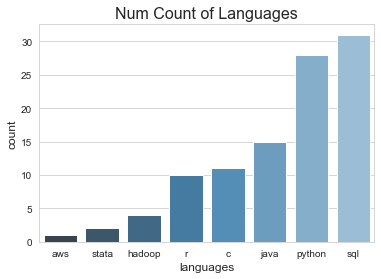

In [52]:
#import libraries for visualizations
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#generating barplot
sns.set_style('whitegrid')
sns.barplot(x= 'Languages', y = 'Count', data = df_languages, palette = 'Blues_d')
plt.xlabel('languages', size = 12)
plt.ylabel('count', size = 12)
plt.title('Num Count of Languages', size = 16)
plt.show

In [54]:
#counting words in viz list
cnt = Counter()
for text in df_jd['descriptions'].values:
    for word in text.split():
        if word not in viz_tools:
            continue
        if word in cnt:
            cnt[word] +=1
        else:
            cnt[word] = 1
Visualization_tools = cnt
Visualization_tools

Counter({'powerbi': 3, 'tableau': 4})

In [55]:
#create dataframe from list, set index and sort
df_viz_tools = pd.DataFrame.from_dict(Visualization_tools, orient='index').reset_index()
df_viz_tools = df_viz_tools.rename(columns={'index':'Viz_tools', 0:'Count'})
df_viz_tools.sort_values('Count', inplace = True)
df_viz_tools 

,Viz_tools,Count
0,powerbi,3
1,tableau,4


<function matplotlib.pyplot.show(*args, **kw)>

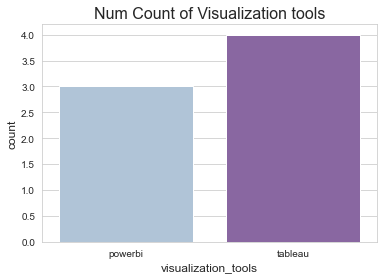

In [56]:
#generating barplot
sns.set_style('whitegrid')
sns.barplot(x= 'Viz_tools', y = 'Count', data = df_viz_tools, palette = 'BuPu')
plt.xlabel('visualization_tools', size = 12)
plt.ylabel('count', size = 12)
plt.title('Num Count of Visualization tools', size = 16)
plt.show

In [57]:
#counting words in microsoft_tools
cnt = Counter()
for text in df_jd['descriptions'].values:
    for word in text.split():
        if word not in microsoft_pac:
            continue
        if word in cnt:
            cnt[word] +=1
        else:
            cnt[word] = 1
Microsoft_tools = cnt
Microsoft_tools

Counter({'ssis': 1,
         'mssql': 2,
         'azure': 9,
         'excel': 56,
         'outlook': 5,
         'powerpoint': 17})

In [58]:
#create dataframe from dict
df_micro = pd.DataFrame.from_dict(Microsoft_tools, orient='index').reset_index()
df_micro = df_micro.rename(columns={'index':'Microsoft_tools', 0:'Count'})
df_micro.sort_values('Count', inplace = True)
df_micro 

,Microsoft_tools,Count
0,ssis,1
1,mssql,2
4,outlook,5
2,azure,9
5,powerpoint,17
3,excel,56


<function matplotlib.pyplot.show(*args, **kw)>

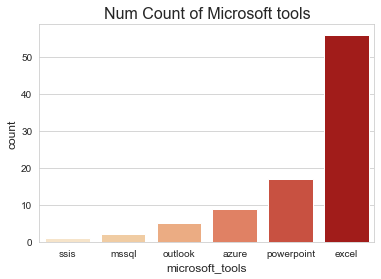

In [59]:
#generating barplot
sns.set_style('whitegrid')
sns.barplot(x= 'Microsoft_tools', y = 'Count', data = df_micro, palette = 'OrRd')
plt.xlabel('microsoft_tools', size = 12)
plt.ylabel('count', size = 12)
plt.title('Num Count of Microsoft tools', size = 16)
plt.show

In [61]:
#counting words in database list
cnt = Counter()
for text in df_jd['descriptions'].values:
    for word in text.split():
        if word not in databases:
            continue
        if word in cnt:
            cnt[word] +=1
        else:
            cnt[word] = 1
databases = cnt
databases

Counter({'mssql': 2, 'mongo': 2, 'nosql': 1, 'postgresql': 7, 'mysql': 7})

In [62]:
#create dataframe
df_database = pd.DataFrame.from_dict(databases, orient='index').reset_index()
df_database = df_database.rename(columns={'index':'Databases', 0:'Count'})
df_database.sort_values('Count', inplace = True)
df_database 

,Databases,Count
2,nosql,1
0,mssql,2
1,mongo,2
3,postgresql,7
4,mysql,7


<function matplotlib.pyplot.show(*args, **kw)>

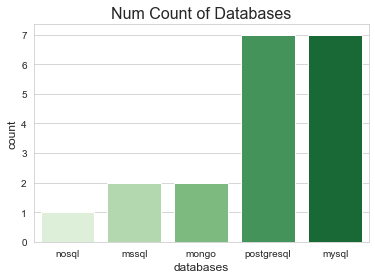

In [63]:
sns.set_style('whitegrid')
sns.barplot(x= 'Databases', y = 'Count', data = df_database, palette = 'Greens')
plt.xlabel('databases', size = 12)
plt.ylabel('count', size = 12)
plt.title('Num Count of Databases', size = 16)
plt.show

In [65]:
#count skills in list
cnt = Counter()
for text in df_jd['descriptions'].values:
    for word in text.split():
        if word not in skills:
            continue
        if word in cnt:
            cnt[word] +=1
        else:
            cnt[word] = 1
Skills = cnt
Skills

Counter({'research': 89,
         'dashboard': 23,
         'database': 107,
         'collection': 45,
         'cleaning': 9,
         'presentation': 49})

In [66]:
#creating dataframe from list
df_skills = pd.DataFrame.from_dict(Skills, orient='index').reset_index()
df_skills = df_skills.rename(columns={'index':'Skills', 0:'Count'})
df_skills.sort_values('Count', inplace = True)
df_skills

,Skills,Count
4,cleaning,9
1,dashboard,23
3,collection,45
5,presentation,49
0,research,89
2,database,107


<function matplotlib.pyplot.show(*args, **kw)>

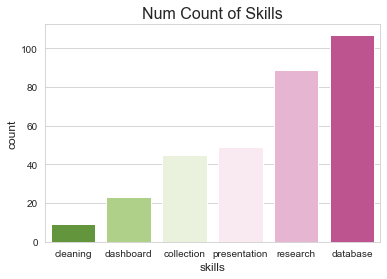

In [68]:
#generating barplot
sns.set_style('whitegrid')
sns.barplot(x= 'Skills', y = 'Count', data = df_skills, palette = 'PiYG_r')
plt.xlabel('skills', size = 12)
plt.ylabel('count', size = 12)
plt.title('Num Count of Skills', size = 16)
plt.show